In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv(r"C:\Users\kamir\slk projects\adaboost\heart_cleveland_upload-checkpoint.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [4]:
for col in ["id", "dataset"]:
    if col in df.columns:
        df = df.drop(col, axis=1)


In [5]:
df = df.fillna(df.median(numeric_only=True))


In [6]:
X = df.drop("condition", axis=1)
y = df["condition"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada.fit(X_train_scaled, y_train)


,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [10]:
y_pred = ada.predict(X_test_scaled)


Accuracy: 0.7166666666666667


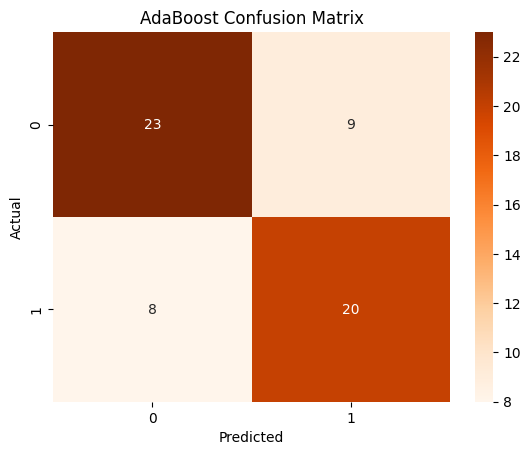


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.69      0.71      0.70        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="d")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [13]:
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

sample_df = pd.DataFrame([sample])
sample_scaled = scaler.transform(sample_df)

result = ada.predict(sample_scaled)[0]

print("\nPrediction:", "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")



Prediction: Heart Disease (1)
